# Module 2 Quiz

**==========================================================================================**

## Project Description / Business Task

To complete the quiz, use the data set BPUrban1000 from the healthds R package. Have an RStudio session open before beginning the quiz.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Import Data

In [2]:
df = pd.read_csv("BPUrban1000.csv")

In [3]:
df

,hypertension,systolic,diastolic,bmi,bmi_group,cholesterol,age,age_group,parent_history_HTN,salt,salt_group,smoking,chewing,activity,weight,waist_circumference,hip_circumference,waist_hip_ratio,fasting_glucose,caste,marital_status,religion,education,gender
0,0,136,59,35.00,BMI>27.49,183,63,>=60,both,1.50,Salt<=5,False,True,sedentary,82.10,61.90,82.30,0.75,75,Schedule tribe,Married,Muslim,>=Graduate,Female
1,0,134,90,18.40,BMI<=27.49,127,30,30-44,either,9.10,5<Salt<=10,False,False,moderate,49.30,99.10,93.70,1.06,130,Other caste,Married,Sikh,>=Graduate,Male
2,1,149,76,28.10,BMI>27.49,132,24,20-29,both,15.20,10<Salt<=20,False,True,severe,78.10,101.10,88.90,1.14,129,General,Married,Hindu,<=Primary,Female
3,0,117,65,29.10,BMI>27.49,126,52,45-59,none,6.00,5<Salt<=10,False,False,moderate,66.60,88.70,100.50,0.88,126,General,Unmarried,Hindu,Middle,Female
4,0,110,74,33.10,BMI>27.49,182,61,>=60,none,13.80,10<Salt<=20,False,False,moderate,73.40,60.40,81.80,0.74,76,Schedule caste,Unmarried,Hindu,<=Primary,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,96,101,24.70,BMI<=27.49,155,21,20-29,none,9.30,5<Salt<=10,False,False,mild,62.00,76.50,73.80,1.04,158,General,Married,Hindu,>=Graduate,Female
996,1,131,53,28.20,BMI>27.49,160,56,45-59,both,0.10,Salt<=5,False,False,sedentary,74.80,77.00,93.60,0.82,53,General,Married,Muslim,Middle,Female
997,1,118,99,30.20,BMI>27.49,166,30,20-29,both,6.40,5<Salt<=10,False,True,mild,92.10,78.40,81.80,0.96,93,Other caste,Widowed,Hindu,Middle,Female
998,0,139,97,32.40,BMI>27.49,146,56,45-59,none,9.10,5<Salt<=10,False,False,moderate,77.00,109.20,103.70,1.05,138,General,Married,Hindu,Middle,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hypertension         1000 non-null   int64  
 1   systolic             1000 non-null   int64  
 2   diastolic            1000 non-null   int64  
 3   bmi                  1000 non-null   float64
 4   bmi_group            1000 non-null   object 
 5   cholesterol          1000 non-null   int64  
 6   age                  1000 non-null   int64  
 7   age_group            1000 non-null   object 
 8   parent_history_HTN   1000 non-null   object 
 9   salt                 1000 non-null   float64
 10  salt_group           1000 non-null   object 
 11  smoking              1000 non-null   bool   
 12  chewing              1000 non-null   bool   
 13  activity             1000 non-null   object 
 14  weight               1000 non-null   float64
 15  waist_circumference  1000 non-null   fl

In [5]:
df.dtypes.value_counts()

object     10
int64       6
float64     6
bool        2
Name: count, dtype: int64

In [6]:
df.isnull().sum()

hypertension           0
systolic               0
diastolic              0
bmi                    0
bmi_group              0
cholesterol            0
age                    0
age_group              0
parent_history_HTN     0
salt                   0
salt_group             0
smoking                0
chewing                0
activity               0
weight                 0
waist_circumference    0
hip_circumference      0
waist_hip_ratio        0
fasting_glucose        0
caste                  0
marital_status         0
religion               0
education              0
gender                 0
dtype: int64

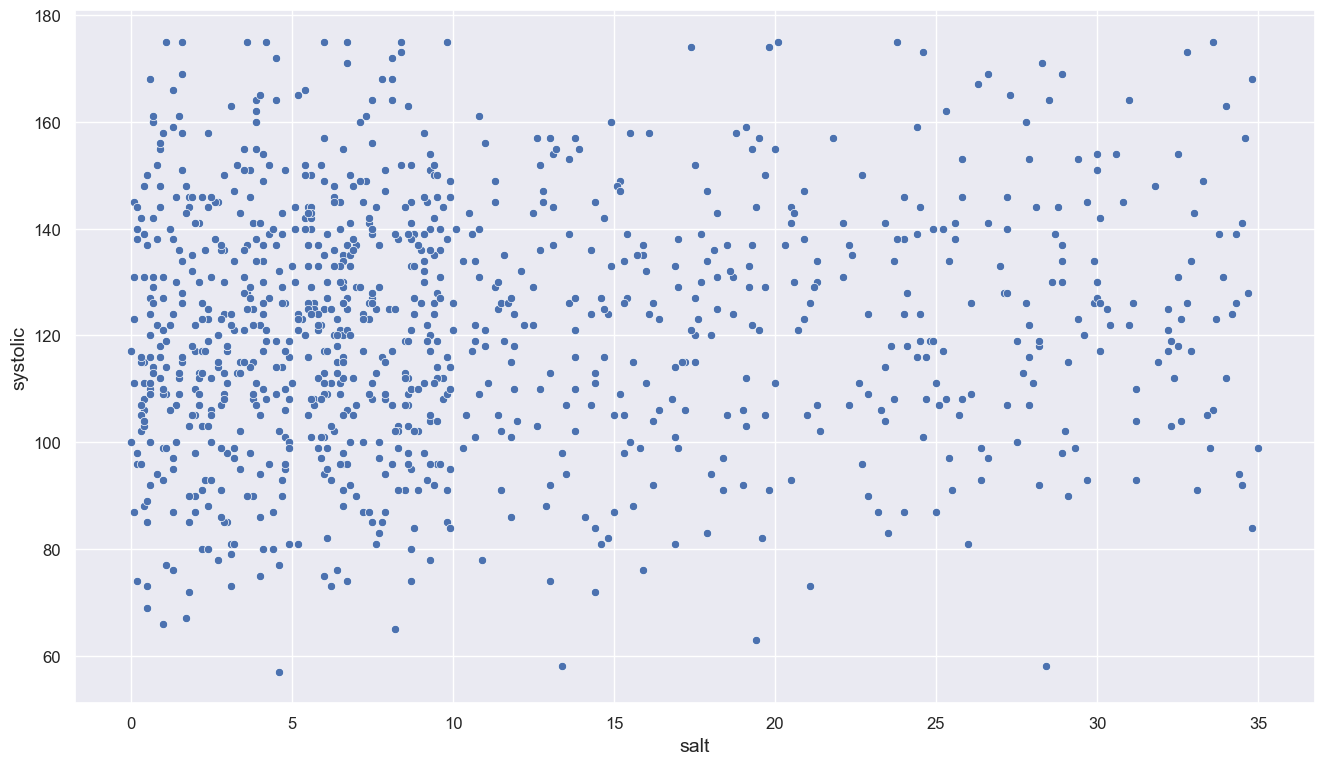

In [7]:
# Create scatterplot of create a scatterplot of systolic blood pressure on the y-axis against daily salt intake on the x-axis
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='salt', y='systolic')

plt.title('', fontsize='14')
plt.show()

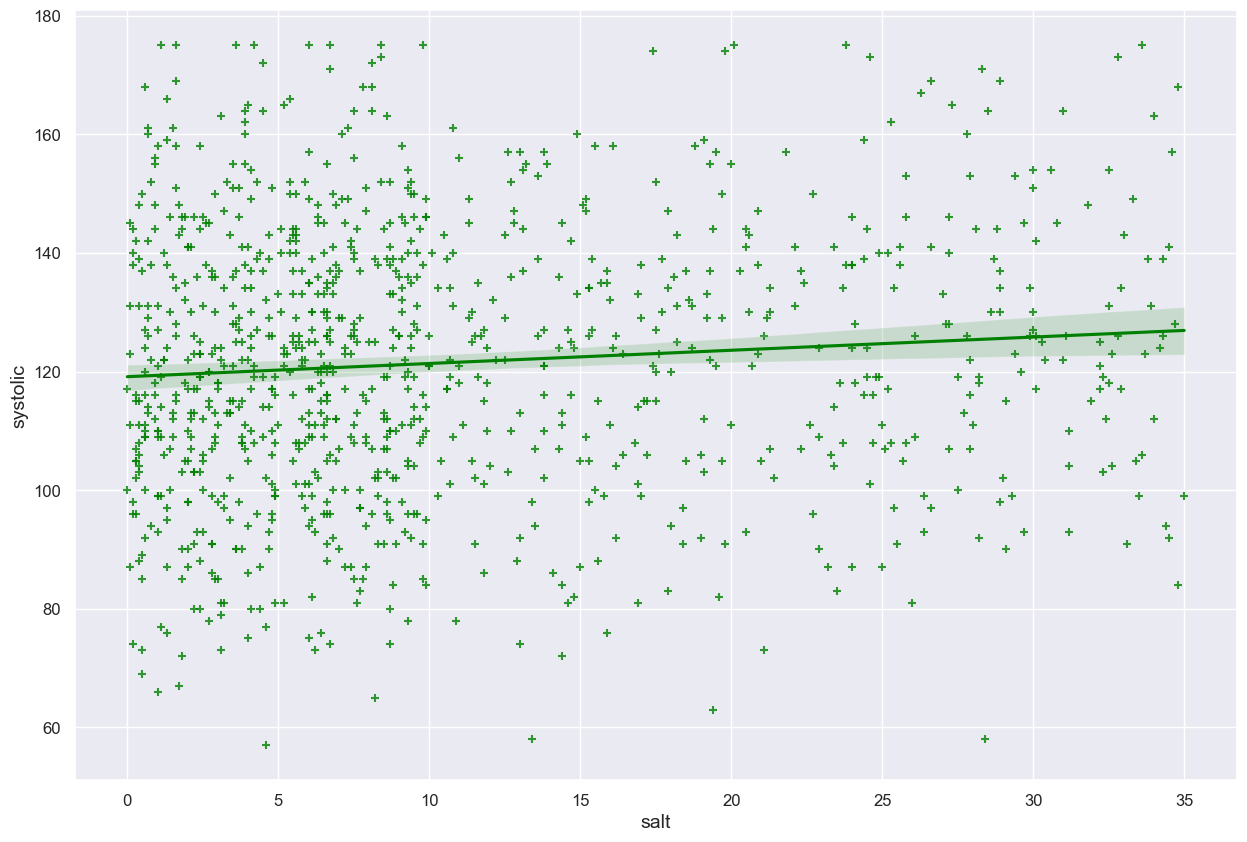

In [8]:
plt.figure(figsize=(15, 10))
sns.regplot(x='salt', y='systolic', data=df, color='green', marker='+')
plt.show()

In [9]:
X = df[["salt"]]

In [10]:
y = df[["systolic"]]

In [11]:
X = sm.add_constant(X)

In [12]:
model = sm.OLS(y, X).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               systolic   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.169
Date:                Thu, 20 Jun 2024   Prob (F-statistic):            0.00435
Time:                        11:52:35   Log-Likelihood:                -4551.3
No. Observations:                1000   AIC:                             9107.
Df Residuals:                     998   BIC:                             9116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.1282      1.122    106.218      0.000     116.927     121.329
salt           0.2227      0.078      2.858      0.004       0.070       0.376
==============================================================================
Omnibus:                        8.289   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.803
Skew:                           0.015   Prob(JB):                       0.0549
Kurtosis:                       2.628   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Now, center the salt variable at its average value and refit the model. Use this 'centered model' to answer the next questions. 

In [15]:
df["salt_cent"] = df["salt"] - (df["salt"]).mean()

In [16]:
df.head()

,hypertension,systolic,diastolic,bmi,bmi_group,cholesterol,age,age_group,parent_history_HTN,salt,salt_group,smoking,chewing,activity,weight,waist_circumference,hip_circumference,waist_hip_ratio,fasting_glucose,caste,marital_status,religion,education,gender,salt_cent
0,0,136,59,35.00,BMI>27.49,183,63,>=60,both,1.50,Salt<=5,False,True,sedentary,82.10,61.90,82.30,0.75,75,Schedule tribe,Married,Muslim,>=Graduate,Female,-9.47
1,0,134,90,18.40,BMI<=27.49,127,30,30-44,either,9.10,5<Salt<=10,False,False,moderate,49.30,99.10,93.70,1.06,130,Other caste,Married,Sikh,>=Graduate,Male,-1.87
2,1,149,76,28.10,BMI>27.49,132,24,20-29,both,15.20,10<Salt<=20,False,True,severe,78.10,101.10,88.90,1.14,129,General,Married,Hindu,<=Primary,Female,4.23
3,0,117,65,29.10,BMI>27.49,126,52,45-59,none,6.00,5<Salt<=10,False,False,moderate,66.60,88.70,100.50,0.88,126,General,Unmarried,Hindu,Middle,Female,-4.97
4,0,110,74,33.10,BMI>27.49,182,61,>=60,none,13.80,10<Salt<=20,False,False,moderate,73.40,60.40,81.80,0.74,76,Schedule caste,Unmarried,Hindu,<=Primary,Female,2.83


In [17]:
X = df[["salt_cent"]]

In [18]:
y = df[["systolic"]]

In [19]:
X = sm.add_constant(X)

In [20]:
model2 = sm.OLS(y, X).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               systolic   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.169
Date:                Thu, 20 Jun 2024   Prob (F-statistic):            0.00435
Time:                        11:52:36   Log-Likelihood:                -4551.3
No. Observations:                1000   AIC:                             9107.
Df Residuals:                     998   BIC:                             9116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.5720      0.726    167.500      0.000     120.148     122.996
salt_cent      0.2227      0.078      2.858      0.004       0.070       0.376
==============================================================================
Omnibus:                        8.289   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.803
Skew:                           0.015   Prob(JB):                       0.0549
Kurtosis:                       2.628   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Module 3 Quiz

To complete the quiz, use the data set BPUrban1000 from the healthds R package. Open an RStudio session before beginning the quiz.

**==========================================================================================================**

In [22]:
df.head()

,hypertension,systolic,diastolic,bmi,bmi_group,cholesterol,age,age_group,parent_history_HTN,salt,salt_group,smoking,chewing,activity,weight,waist_circumference,hip_circumference,waist_hip_ratio,fasting_glucose,caste,marital_status,religion,education,gender,salt_cent
0,0,136,59,35.00,BMI>27.49,183,63,>=60,both,1.50,Salt<=5,False,True,sedentary,82.10,61.90,82.30,0.75,75,Schedule tribe,Married,Muslim,>=Graduate,Female,-9.47
1,0,134,90,18.40,BMI<=27.49,127,30,30-44,either,9.10,5<Salt<=10,False,False,moderate,49.30,99.10,93.70,1.06,130,Other caste,Married,Sikh,>=Graduate,Male,-1.87
2,1,149,76,28.10,BMI>27.49,132,24,20-29,both,15.20,10<Salt<=20,False,True,severe,78.10,101.10,88.90,1.14,129,General,Married,Hindu,<=Primary,Female,4.23
3,0,117,65,29.10,BMI>27.49,126,52,45-59,none,6.00,5<Salt<=10,False,False,moderate,66.60,88.70,100.50,0.88,126,General,Unmarried,Hindu,Middle,Female,-4.97
4,0,110,74,33.10,BMI>27.49,182,61,>=60,none,13.80,10<Salt<=20,False,False,moderate,73.40,60.40,81.80,0.74,76,Schedule caste,Unmarried,Hindu,<=Primary,Female,2.83


In [23]:
(df["bmi"]).mean()

28.0978

In [24]:
(df["age"]).mean()

51.842

In [25]:
(df["salt"]).mean()

10.971099999999998

In [26]:
df["bmi_cent"] = df["bmi"] - (df["bmi"]).mean()

In [27]:
df["age_cent"] = df["age"] - (df["age"]).mean()

In [28]:
df["salt_cent"] = df["salt"] - (df["salt"]).mean()

In [29]:
df.head()

,hypertension,systolic,diastolic,bmi,bmi_group,cholesterol,age,age_group,parent_history_HTN,salt,salt_group,smoking,chewing,activity,weight,waist_circumference,hip_circumference,waist_hip_ratio,fasting_glucose,caste,marital_status,religion,education,gender,salt_cent,bmi_cent,age_cent
0,0,136,59,35.00,BMI>27.49,183,63,>=60,both,1.50,Salt<=5,False,True,sedentary,82.10,61.90,82.30,0.75,75,Schedule tribe,Married,Muslim,>=Graduate,Female,-9.47,6.90,11.16
1,0,134,90,18.40,BMI<=27.49,127,30,30-44,either,9.10,5<Salt<=10,False,False,moderate,49.30,99.10,93.70,1.06,130,Other caste,Married,Sikh,>=Graduate,Male,-1.87,-9.70,-21.84
2,1,149,76,28.10,BMI>27.49,132,24,20-29,both,15.20,10<Salt<=20,False,True,severe,78.10,101.10,88.90,1.14,129,General,Married,Hindu,<=Primary,Female,4.23,0.00,-27.84
3,0,117,65,29.10,BMI>27.49,126,52,45-59,none,6.00,5<Salt<=10,False,False,moderate,66.60,88.70,100.50,0.88,126,General,Unmarried,Hindu,Middle,Female,-4.97,1.00,0.16
4,0,110,74,33.10,BMI>27.49,182,61,>=60,none,13.80,10<Salt<=20,False,False,moderate,73.40,60.40,81.80,0.74,76,Schedule caste,Unmarried,Hindu,<=Primary,Female,2.83,5.00,9.16


In [30]:
df.smoking.value_counts()

smoking
False    919
True      81
Name: count, dtype: int64

In [31]:
df['smoking'] = df['smoking'].astype(int)

In [32]:
df.smoking.value_counts()

smoking
0    919
1     81
Name: count, dtype: int64

In [33]:
df.chewing.value_counts()

chewing
False    567
True     433
Name: count, dtype: int64

In [34]:
df['chewing'] = df['chewing'].astype(int)

In [35]:
df.chewing.value_counts()

chewing
0    567
1    433
Name: count, dtype: int64

In [36]:
df["parent_history_HTN"].value_counts()

parent_history_HTN
none      569
both      241
either    190
Name: count, dtype: int64

In [37]:
df_dummies = pd.get_dummies(df['parent_history_HTN'], prefix='parent_history_HTN', dtype=int)

In [38]:
df_dummies

,parent_history_HTN_both,parent_history_HTN_either,parent_history_HTN_none
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
995,0,0,1
996,1,0,0
997,1,0,0
998,0,0,1


In [39]:
df = pd.concat([df, df_dummies], axis=1)

In [40]:
df.head()

,hypertension,systolic,diastolic,bmi,bmi_group,cholesterol,age,age_group,parent_history_HTN,salt,salt_group,smoking,chewing,activity,weight,waist_circumference,hip_circumference,waist_hip_ratio,fasting_glucose,caste,marital_status,religion,education,gender,salt_cent,bmi_cent,age_cent,parent_history_HTN_both,parent_history_HTN_either,parent_history_HTN_none
0,0,136,59,35.00,BMI>27.49,183,63,>=60,both,1.50,Salt<=5,0,1,sedentary,82.10,61.90,82.30,0.75,75,Schedule tribe,Married,Muslim,>=Graduate,Female,-9.47,6.90,11.16,1,0,0
1,0,134,90,18.40,BMI<=27.49,127,30,30-44,either,9.10,5<Salt<=10,0,0,moderate,49.30,99.10,93.70,1.06,130,Other caste,Married,Sikh,>=Graduate,Male,-1.87,-9.70,-21.84,0,1,0
2,1,149,76,28.10,BMI>27.49,132,24,20-29,both,15.20,10<Salt<=20,0,1,severe,78.10,101.10,88.90,1.14,129,General,Married,Hindu,<=Primary,Female,4.23,0.00,-27.84,1,0,0
3,0,117,65,29.10,BMI>27.49,126,52,45-59,none,6.00,5<Salt<=10,0,0,moderate,66.60,88.70,100.50,0.88,126,General,Unmarried,Hindu,Middle,Female,-4.97,1.00,0.16,0,0,1
4,0,110,74,33.10,BMI>27.49,182,61,>=60,none,13.80,10<Salt<=20,0,0,moderate,73.40,60.40,81.80,0.74,76,Schedule caste,Unmarried,Hindu,<=Primary,Female,2.83,5.00,9.16,0,0,1


In [41]:
df.activity.value_counts()

activity
sedentary    264
moderate     260
severe       238
mild         238
Name: count, dtype: int64

In [42]:
df_dummies = pd.get_dummies(df['activity'], prefix='activity', dtype=int)

In [43]:
df_dummies

,activity_mild,activity_moderate,activity_sedentary,activity_severe
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
995,1,0,0,0
996,0,0,1,0
997,1,0,0,0
998,0,1,0,0


In [44]:
df = pd.concat([df, df_dummies], axis=1)

In [45]:
df

,hypertension,systolic,diastolic,bmi,bmi_group,cholesterol,age,age_group,parent_history_HTN,salt,salt_group,smoking,chewing,activity,weight,waist_circumference,hip_circumference,waist_hip_ratio,fasting_glucose,caste,marital_status,religion,education,gender,salt_cent,bmi_cent,age_cent,parent_history_HTN_both,parent_history_HTN_either,parent_history_HTN_none,activity_mild,activity_moderate,activity_sedentary,activity_severe
0,0,136,59,35.00,BMI>27.49,183,63,>=60,both,1.50,Salt<=5,0,1,sedentary,82.10,61.90,82.30,0.75,75,Schedule tribe,Married,Muslim,>=Graduate,Female,-9.47,6.90,11.16,1,0,0,0,0,1,0
1,0,134,90,18.40,BMI<=27.49,127,30,30-44,either,9.10,5<Salt<=10,0,0,moderate,49.30,99.10,93.70,1.06,130,Other caste,Married,Sikh,>=Graduate,Male,-1.87,-9.70,-21.84,0,1,0,0,1,0,0
2,1,149,76,28.10,BMI>27.49,132,24,20-29,both,15.20,10<Salt<=20,0,1,severe,78.10,101.10,88.90,1.14,129,General,Married,Hindu,<=Primary,Female,4.23,0.00,-27.84,1,0,0,0,0,0,1
3,0,117,65,29.10,BMI>27.49,126,52,45-59,none,6.00,5<Salt<=10,0,0,moderate,66.60,88.70,100.50,0.88,126,General,Unmarried,Hindu,Middle,Female,-4.97,1.00,0.16,0,0,1,0,1,0,0
4,0,110,74,33.10,BMI>27.49,182,61,>=60,none,13.80,10<Salt<=20,0,0,moderate,73.40,60.40,81.80,0.74,76,Schedule caste,Unmarried,Hindu,<=Primary,Female,2.83,5.00,9.16,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,96,101,24.70,BMI<=27.49,155,21,20-29,none,9.30,5<Salt<=10,0,0,mild,62.00,76.50,73.80,1.04,158,General,Married,Hindu,>=Graduate,Female,-1.67,-3.40,-30.84,0,0,1,1,0,0,0
996,1,131,53,28.20,BMI>27.49,160,56,45-59,both,0.10,Salt<=5,0,0,sedentary,74.80,77.00,93.60,0.82,53,General,Married,Muslim,Middle,Female,-10.87,0.10,4.16,1,0,0,0,0,1,0
997,1,118,99,30.20,BMI>27.49,166,30,20-29,both,6.40,5<Salt<=10,0,1,mild,92.10,78.40,81.80,0.96,93,Other caste,Widowed,Hindu,Middle,Female,-4.57,2.10,-21.84,1,0,0,1,0,0,0
998,0,139,97,32.40,BMI>27.49,146,56,45-59,none,9.10,5<Salt<=10,0,0,moderate,77.00,109.20,103.70,1.05,138,General,Married,Hindu,Middle,Female,-1.87,4.30,4.16,0,0,1,0,1,0,0


In [46]:
df.columns

Index(['hypertension', 'systolic', 'diastolic', 'bmi', 'bmi_group', 'cholesterol', 'age', 'age_group', 'parent_history_HTN', 'salt', 'salt_group', 'smoking', 'chewing', 'activity', 'weight', 'waist_circumference', 'hip_circumference', 'waist_hip_ratio', 'fasting_glucose', 'caste', 'marital_status', 'religion', 'education', 'gender', 'salt_cent', 'bmi_cent', 'age_cent', 'parent_history_HTN_both', 'parent_history_HTN_either', 'parent_history_HTN_none', 'activity_mild', 'activity_moderate', 'activity_sedentary', 'activity_severe'], dtype='object')

In [47]:
X = df[['bmi_cent', 'age_cent', 'salt_cent', 'parent_history_HTN_both', 'parent_history_HTN_either', 'parent_history_HTN_none', 'activity_mild', 'activity_moderate', 
        'activity_sedentary', 'activity_severe', 'smoking', 'chewing']]

In [48]:
y = df[["systolic"]]

In [49]:
X = sm.add_constant(X)

In [50]:
model3 = sm.OLS(y, X).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               systolic   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     16.04
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           5.36e-27
Time:                        11:52:36   Log-Likelihood:                -4480.3
No. Observations:                1000   AIC:                             8983.
Df Residuals:                     989   BIC:                             9037.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        75.9334      0.618    122.879      0.000      74.721      77.146
bmi_cent                      0.3848      0.176      2.180      0.029       0.038       0.731
age_cent                      0.4207      0.046      9.048      0.000       0.329       0.512
salt_cent                     0.2656      0.073      3.616      0.000       0.121       0.410
parent_history_HTN_both      29.5351      1.133     26.062      0.000      27.311      31.759
parent_history_HTN_either    24.1383      1.236     19.527      0.000      21.712      26.564
parent_history_HTN_none      22.2600      0.879     25.331      0.000      20.536      23.984
activity_mild                14.7425      1.218     12.107      0.000      12.353      17.132
activity_moderate            17.0845      1.177     14.514      0.000      14.775      19.394
activity_sedentary           22.1089      1.162     19.020      0.000      19.828      24.390
activity_severe              21.9975      1.209     18.190      0.000      19.624      24.371
smoking                       9.7250      2.504      3.884      0.000       4.812      14.638
chewing                       3.3667      1.374      2.451      0.014       0.671       6.062
==============================================================================
Omnibus:                        8.976   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.167
Skew:                          -0.014   Prob(JB):                       0.0458
Kurtosis:                       2.616   Cond. No.                     2.35e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.92e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Python code done by Dennis Lam